# Short Skimage Tutorial

This is a very short introduction to the [Scikit-image library](http://scikit-image.org/), including the main operations for image manipulation.

What is an image? Images are n-dimensional arrays where each element corresponds to a pixel. 

The most common image kinds are:

a) grey-level images containing 1 channel of X rows and Y columns.

b) RGB /color images containing 3 channels per color (RGB) where each channel/plane is formed by X rows and Y columns.

Images manipulated by the Scikit-image library are stored as Numpy arrays. According to what type are the values of the pixels, we can have different [types of images](http://scikit-image.org/docs/stable/user_guide/data_types.html?highlight=image%20type). 

 See [A crash course on NumPy for images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#numpy-indexing) for more information.

## Reading and writing images

Utilities to read and write images in various formats are available in the Module `io`.

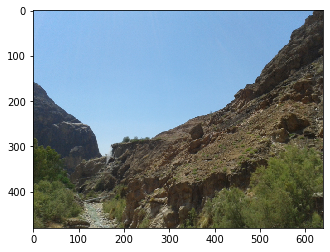

In [3]:
from skimage import io
import matplotlib.pyplot as plt

img = io.imread('images/jordan.jpeg')
plt.imshow(img) #Visualizing a figure with the image
plt.show()

img2 = img*0
io.imsave('images/black_image.bmp',img2) 

**Exercise**: Visualize the image you just stored on the disk.

In [4]:
# Soultion here

Scikit-image provides a set of [standard test images](http://scikit-image.org/docs/dev/api/skimage.data.html?highlight=imread#skimage.data.imread) in the Module `data`: astronaut, binary_blobs, camera, checkerboard, chelsea, clock, coffee, coins, etc.

<class 'numpy.ndarray'>
(512, 512)
262144


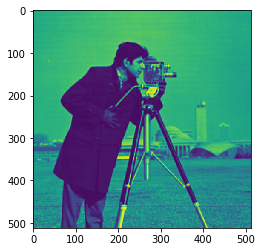

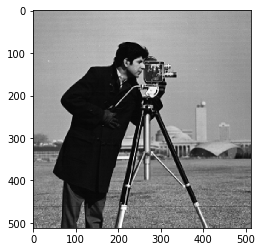

In [5]:
from skimage import data

camera = data.camera()
print(type(camera))
print(camera.shape)
print(camera.size)
plt.imshow(camera)
plt.show()
plt.imshow(camera, cmap='gray') # we can visualize the image 'camera' in gray scale
plt.show()

## Basic image manipulation

NumPy arrays representing images can be of different numerical types, such as integer or float. 

See [Image data types and what they mean](http://scikit-image.org/docs/dev/user_guide/data_types.html#data-types) for more information about these types and how scikit-image treats them.

How shell we change the type of an image?

In [6]:
from skimage import img_as_float
import numpy as np

image = np.arange(0, 255, 50, dtype=np.uint8) # arange function defines a vector from 0 to 250 in steps of 50.
print(image)

[  0  50 100 150 200 250]


What is the difference between the two following operations?

In [7]:
print(image.astype(np.float))
print(img_as_float(image))

[  0.  50. 100. 150. 200. 250.]
[0.         0.19607843 0.39215686 0.58823529 0.78431373 0.98039216]


Images represented with `skimage` can take different values and types. For instance, `ubyte` images range from 0 (black) to 255 (white). And `float` images range from 0.0 (black) to 1.0 (white).

How to convert an image from `ubyte` to `float`? And from `float` to `uint8`?

See skimage reference [page](http://scikit-image.org/docs/dev/api/skimage.html#utility-functions).

In [8]:
from skimage import img_as_ubyte

print(image)
im_float = img_as_float(image)
print(im_float)
im_uint8 = img_as_ubyte(im_float)
print(im_uint8)

[  0  50 100 150 200 250]
[0.         0.19607843 0.39215686 0.58823529 0.78431373 0.98039216]
[  0  50 100 150 200 250]


//anaconda3/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Spatial and photometric resolution: 
### Function `rescale` 

Sometimes we need to change the spatial and photometric resolution of an image. For this, we will use functions like rescale and resize. Consider the following example:

In [9]:
from skimage import data
from skimage.transform import rescale

image = data.coins()
print(image.dtype, image.min(), image.max(), image.shape)

uint8 1 252 (303, 384)


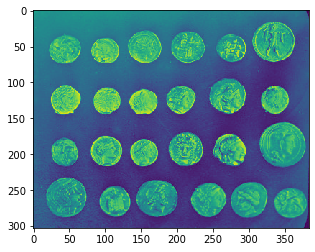

In [10]:
plt.imshow(image)
plt.show()

In [11]:
rescaled = rescale(image, 0.5)
print(rescaled.dtype, np.round(rescaled.min(),4), np.round(rescaled.max(),4), rescaled.shape)



float64 0.0157 0.9114 (152, 192)


//anaconda3/lib/python3.7/site-packages/skimage/transform/_warps.py:23: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '


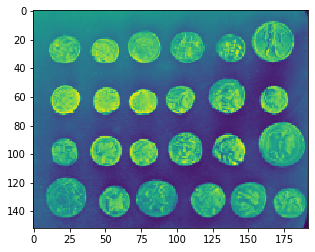

In [12]:
plt.imshow(rescaled)
plt.show()

What does the function rescale do? Check skimage documentation [here](https://scikit-image.org/docs/dev/api/skimage.transform.html?highlight=rescale#skimage.transform.rescale).

What is the difference with the resize command?

float64 4.0 232.4046 (152, 192)


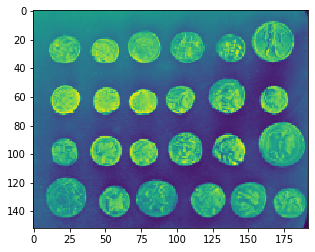

In [13]:
rescaled2 = rescale(image, 0.5, preserve_range=True)
print(rescaled2.dtype, np.round(rescaled2.min(),4), np.round(rescaled2.max(),4), rescaled2.shape)

plt.imshow(rescaled2)
plt.show()


How to rescale intensity values?

255 0 (512, 512)


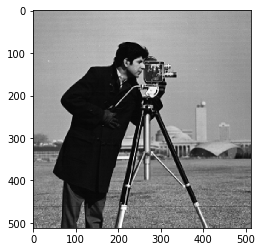

In [14]:
camera = data.camera()
print(camera.max(), camera.min(), camera.shape)
plt.imshow(camera, cmap='gray')
plt.show()

127.5 0.0 (512, 512)


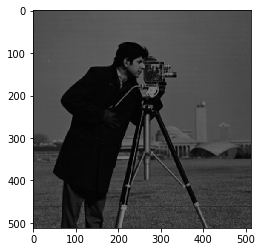

In [15]:
camera2 = camera/2
print(camera2.max(), camera2.min(), camera2.shape)
plt.imshow(camera2, cmap='gray', vmin=0, vmax=255)
plt.show()

227.5 100.0 (512, 512)


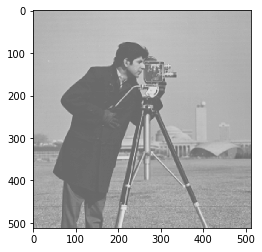

In [16]:
camera3 = camera2+100
print(camera3.max(), camera3.min(), camera3.shape)
plt.imshow(camera3, cmap='gray', vmin=0, vmax=255)
plt.show()

225 7 (64, 64)


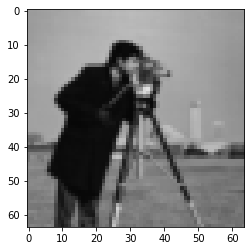

In [17]:
from skimage.transform import resize
from skimage import img_as_ubyte # img_as_ubyte Convert an image to 8-bit unsigned integer format

camera4 = img_as_ubyte(resize(camera,(64,64))) 
print(camera4.max(), camera4.min(), camera4.shape)
plt.imshow(camera4, cmap='gray', vmin=0, vmax=255)
plt.show()

More examples can be seen in the [Matplotlib Image tutorial](https://matplotlib.org/users/image_tutorial.html).

## Color (RGB) images

A color image is a NumPy array, with an additional trailing dimension for the channels. See [Scikit-image Color images](http://scikit-image.org/docs/dev/user_guide/numpy_images.html#color-images) for more information.

<class 'numpy.ndarray'>
(300, 451, 3)


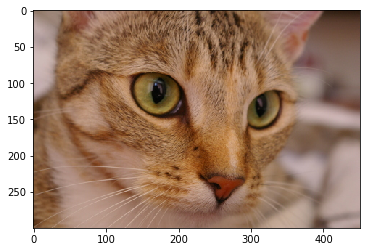

In [18]:
cat = data.chelsea()
print(type(cat))
print(cat.shape)
plt.imshow(cat)
plt.show()

Remember the way `numpy` allows us to index certain positions in a matrix. If we have a matrix `M`, we can access to a certain pixel `(i,j)` using the command `M[i,j]`, where `i` is the row and `j` the column. In order to index all the positions, we have to use the character `:`.

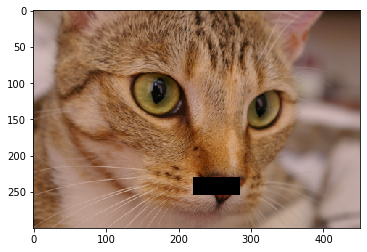

In [19]:
cat[230:255, 220:285] = 0 # set the pixels at rows from 230 to 255, columns from 220 to 285 to black
plt.imshow(cat)
plt.show()


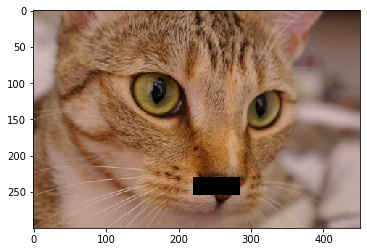

In [20]:
cat[50, 61] = [0, 255, 0] # set the pixel at row 50, column 61 to green; remember [red, green, blue]
plt.imshow(cat)
plt.show()

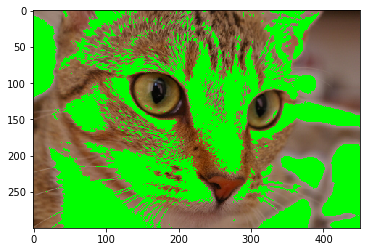

In [21]:
cat = data.chelsea()
# set the pixel of red values greater than 160 to green
reddish = cat[:, :, 0] > 160 # create a mask with the pixel of red values greater than 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)
plt.show()

Note that it is always much faster to iterate on the rightmost indices. See the following example.

In [22]:
def in_order_multiply(arr, scalar):
     for plane in range(arr.shape[0]):
         arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
     for plane in range(arr.shape[2]):
         arr[:, :, plane] *= scalar

import time

im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()

print("%.2f seconds" % (t1 - t0))  

im3d_t = np.transpose(im3d).copy() # place "planes" dimension at end
print (im3d_t.shape)
s0 = time.time(); x = out_of_order_multiply(im3d_t, 5); s1 = time.time()

print("%.2f seconds" % (s1 - s0))  

print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))  

0.10 seconds
(1024, 1024, 100)
1.93 seconds
Speedup: 18.8x


Addendum to dimension names and orders in Scikit-image:

Image type: 2D color video       
Coordinates: (t, row, col, ch)

## Image adjustment: transforming image content


### Color manipulation

Most functions for manipulating color channels are found in the Module `color`. See [Scikit-image Color manipulation](http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html) for more information.

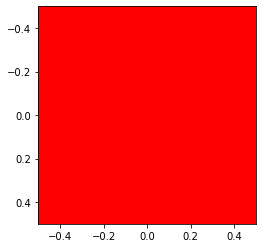

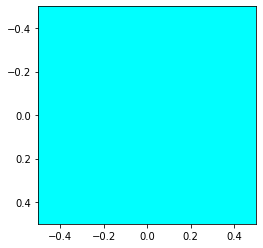

In [23]:
from skimage import color

# bright saturated red
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
plt.imshow(red_pixel_rgb)
plt.show()

hsv = color.rgb2hsv(red_pixel_rgb)
plt.imshow(hsv)
plt.show()

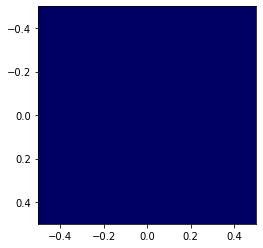

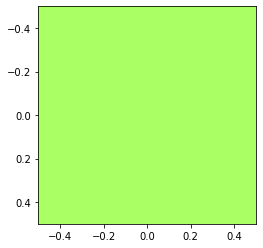

In [24]:
# darker saturated blue
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
plt.imshow(dark_blue_pixel_rgb)
plt.show()

hsv = color.rgb2hsv(dark_blue_pixel_rgb)
plt.imshow(hsv)
plt.show()

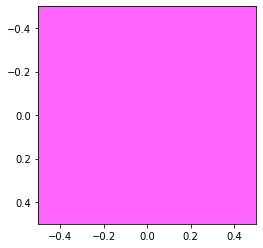

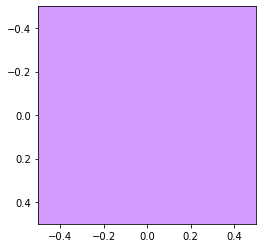

In [25]:
# less saturated pink
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
plt.imshow(pink_pixel_rgb)
plt.show()

hsv = color.rgb2hsv(pink_pixel_rgb)
plt.imshow(hsv)
plt.show()

### Conversion from RGBA to RGB - Removing alpha channel through alpha blending

Often you can find color images in format [RGBA](https://en.wikipedia.org/wiki/Alpha_compositing#Alpha_blending). The forth component shows the coefficient of blending of each channel. Converting an RGBA image to an RGB image by alpha blending it with a background is performend by the command `rgba2rgb()`.

(500, 500, 4)


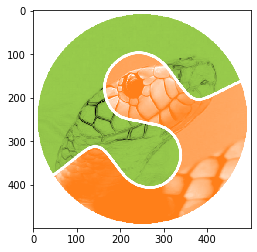

(500, 500, 3)


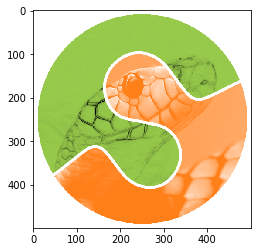

In [26]:
from skimage.color import rgba2rgb
# RGBA has 24 bits for RGB color, bit there is an additional 8 bit value for transparency.

img_rgba = data.logo()
print(img_rgba.shape)
plt.imshow(img_rgba)
plt.show()

img_rgb = rgba2rgb(img_rgba)
print(img_rgb.shape)
plt.imshow(img_rgb)
plt.show()

### Conversion between color and gray values

Often we will need to convert color images to gray level images. Converting an RGB image to a grayscale image is per with `rgb2gray()`

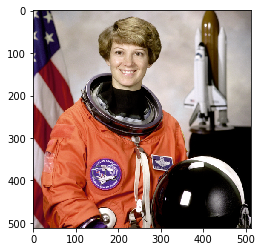

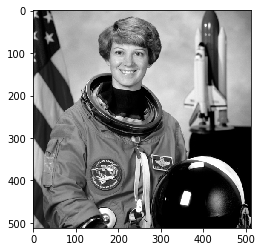

In [27]:
from skimage.color import rgb2gray

img = data.astronaut()
plt.imshow(img)
plt.show()

img_gray = rgb2gray(img)
plt.imshow(img_gray, cmap='gray')
plt.show()

Note that:

In [28]:
print (img.dtype, img.max())
print (img_gray.dtype, img_gray.max())

uint8 255
float64 1.0


In [29]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
print(rgb2gray(red_pixel))

green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
print (rgb2gray(green_pixel))


[[0.2125]]
[[0.7154]]


Given a gray image, how would it be looking if it is converted to RGB values? 

## Displaying  images and graphics

[Matplotlib](https://matplotlib.org/index.html) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. 

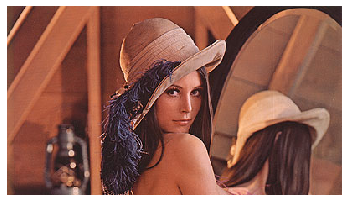

In [30]:
"""
Simple demo of the imshow function.
"""
import matplotlib.pyplot as plt

image = plt.imread('images/lenna.jpg')

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')  # clear x- and y-axes
plt.show()

See how to visualize multiple images:

Another [example](https://matplotlib.org/examples/pylab_examples/image_nonuniform.html) of how to display multiple images:

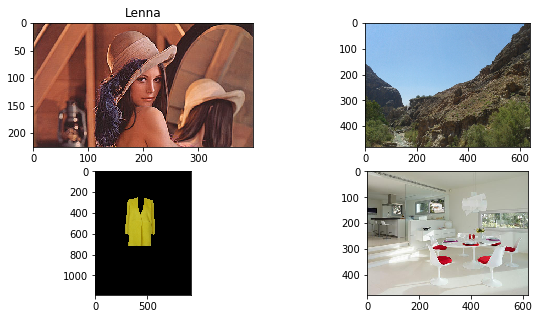

In [31]:
'''
    Matplotlib let's us plot a grid of images with any configuration that we want.
'''

import numpy as np
import matplotlib.pyplot as plt

image1 = plt.imread('images/lenna.jpg')
image2 = plt.imread('images/jordan.jpeg')
image3 = plt.imread('images/coat.png')
image4 = plt.imread('images/sillas.jpg')


f, axarr = plt.subplots(ncols=2, nrows=2,figsize=(10,5))
axarr[0,0].imshow(image1)
axarr[0,0].set_title('Lenna')
axarr[0,1].imshow(image2)
axarr[1,0].imshow(image3)
axarr[1,1].imshow(image4)
plt.show()

**Exercise:**

Visualize in a figure four images, in 2 rows and 2 columns: a) the cat, b) the cat with the black mask, c) the cat converted into gray levels and the cat with double reduced size. 

Add titles to explain what each image represents to. 

In [32]:
# Your solution here

Credits: Marc Bolaños